# TP1-INF8460  (Automne 2022)

Ce TP utilise la librairie NLTK, ScikitLearn, numpy, matplotlib et Jupyter notebook. Ces librairies ainsi que toutes les librairies de base provenant de python sont permises. 

Il est conseillé d’installer Anaconda avec Python 3.10.6 

## 0. Lecture du ficher et importation

In [44]:
import pandas as pd
import nltk
import numpy as np

nltk.download('punkt')

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanmarsimon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Pré-traitement et analyse statistique de corpus

#### 1.1 Implémentez la fonction preprocess qui prends une chaine de caractères et retourne les fonctions de pré-traitements:
1. Enlever les majuscules
2. Enlever les caractères de ponctuations
3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
4. Enlever les stopwords
5. Effectuer une racinisation (stemming)

Vous pouvez utiliser la librarie nltk pour ces étapes. Assurez-vous que les tests situés plus bas passent.

In [45]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont: 
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
    4. Enlever les stopwords
    5. Stemming (racinisation)
    
    :param sentence: une chaine de caractère
    :return: la liste de jetons
    """ 
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    tokens = word_tokenize(sentence)
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

    

In [46]:
assert preprocess("Test") == ["test"]
assert preprocess("This is a test! this, is a TEST") == ["test", "test"]
assert preprocess("32-Year-Old Minor-Leaguer Called Up To Lakers Aces NBA Debut") == \
        ['32','year','old','minor','leaguer','call','laker','ace','nba','debut']
assert preprocess("Judging Slammed For Ranking Adam Rippon Third Place") == \
        ['judg', 'slam', 'rank', 'adam', 'rippon', 'third', 'place']

In [47]:
# Application de la fonction preprocess sur tous les documents

train["headline"] = train["headline"].apply(preprocess)
test["headline"] = test["headline"].apply(preprocess)
train

,category,headline
0,BUSINESS,"[mastercard, want, pay, stuff, selfi, compani,..."
1,BUSINESS,"[father, day, gift, daughter, make, connect, d..."
2,COMEDY,"[hasti, pud]"
3,BUSINESS,"[musk, miss, piec, tesla, insid, share, insigh..."
4,COMEDY,"[argu, femal, cast, trump, ghostbust, parodi, ..."
...,...,...
15014,BUSINESS,"[remi, martin, 2, 500, euro, loui, xiii, cogna..."
15015,COMEDY,"[funniest, someecard, week, pictur, tax, day, ..."
15016,CRIME,"[mobster, whitey, bulger, say, life, wast, let..."
15017,TECH,"[watch, top, 9, youtub, video, week, look, see..."


#### 1.2 Implémentez du code qui affiche les informations suivantes (une information / cellule):
    
    
- le nombre de jetons des descriptions en moyenne
- le nombre d’exemples par catégorie (**utilisez une figure**)
- le nombre moyen de jetons des descriptions en moyenne par catégorie (**utilisez une figure**)
- le nombre maximal de jetons et le nombre minimal par catégorie

In [48]:
sum_tokens = 0
for headline in train["headline"]:
    sum_tokens += len(headline)
mean = sum_tokens / len(train["headline"])
mean

16.658366069645115

,headline
category,
BUSINESS,4704
COMEDY,4163
CRIME,2749
SCIENCE,1746
TECH,1657


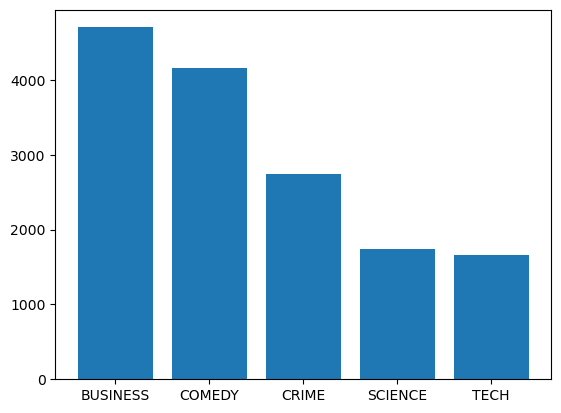

In [49]:
import matplotlib.pyplot as plt
df = pd.DataFrame(train)
df = df.groupby('category').count()
plt.bar(df.index, df['headline'])
df


<BarContainer object of 5 artists>

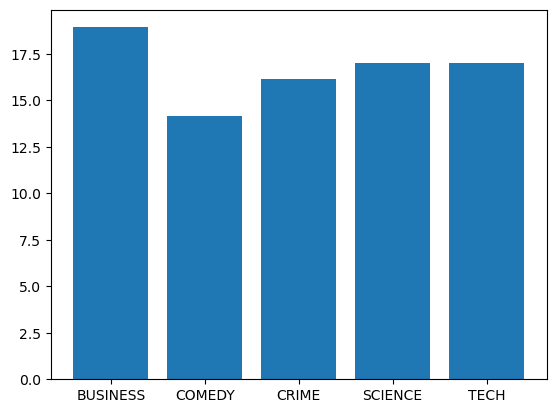

In [50]:
import matplotlib.pyplot as plt
df = pd.DataFrame(train)
# mean number of tokens per category
df = df['headline'].groupby(df['category']).agg(lambda x: x.str.len().mean())
plt.bar(df.index, df)


In [51]:
df = pd.DataFrame(train)
df = df['headline'].groupby(df['category']).agg(lambda x: x.str.len().max())
df

category
BUSINESS    90
COMEDY      78
CRIME       75
SCIENCE     50
TECH        49
Name: headline, dtype: int64

#### 1.3 Implémentez la fonction build_voc qui extrait votre vocabulaire de l’ensemble d’entrainement et crée une liste des jetons qui ont une fréquence d’occurrence de 5 au moins

In [52]:

def build_voc(documents):
    token_dict = {}
    for doc in documents:
        for token in doc:
            if token in token_dict:
                token_dict[token] += 1
            else:
                token_dict[token] = 1
    voc = [token for token in token_dict if token_dict[token] >= 5]

    return voc

In [53]:
vocabulary = build_voc(train["headline"])
vocabulary

['want',
 'pay',
 'stuff',
 'selfi',
 'compani',
 'roll',
 'new',
 'secur',
 'featur',
 'allow',
 'use',
 'fingerprint',
 'ident',
 'father',
 'day',
 'gift',
 'daughter',
 'make',
 'connect',
 'dad',
 'workplac',
 'readi',
 'men',
 'today',
 'never',
 'musk',
 'miss',
 'piec',
 'tesla',
 'insid',
 'share',
 'insight',
 'even',
 'elon',
 'announc',
 'detail',
 'product',
 'car',
 'batteri',
 'storag',
 'home',
 'busi',
 'util',
 'call',
 'signific',
 'argu',
 'femal',
 'cast',
 'trump',
 'parodi',
 'afraid',
 'wealthi',
 'greek',
 'tax',
 'escap',
 'crackdown',
 'eu',
 'imf',
 'report',
 'greec',
 'difficult',
 'govern',
 'shore',
 'financ',
 'billion',
 'women',
 'chief',
 'market',
 'offic',
 'jpmorgan',
 'chase',
 'realli',
 'good',
 'person',
 'job',
 'sign',
 'hang',
 'work',
 'hard',
 'kind',
 'amaz',
 'thing',
 'happen',
 'corni',
 'mayb',
 'true',
 'smith',
 'eddi',
 'talk',
 'youth',
 'unemploy',
 'huffpost',
 'live',
 'video',
 'presid',
 'co',
 'creator',
 'roy',
 'join',
 '

#### 1.4 Vous devez créer une fonction get_top_vocab(vocab, n) qui retourne les n jetons les plus fréquents et les affiche

In [54]:

def get_top_vocab(vocab, n):
    token_dict = {}
    for token in vocab:
        token_dict[token] = 0
    for doc in train["headline"]:
        for token in doc:
            if token in token_dict:
                token_dict[token] += 1
    top_vocab = sorted(token_dict, key=token_dict.get, reverse=True)[:n]
    
    return top_vocab

#### 1.5 Affichez les 10 jetons les plus fréquents du vocabulaire de l’ensemble d’entraînement 

In [55]:
get_top_vocab(vocabulary, 10)

['new', 'year', 'video', 'trump', 'one', 'time', 'say', 'get', 'peopl', 'like']

#### 1.6 Vous devez créer une fonction get_top_vocab_per_cls(dataset, n, cls) qui retourne les n jetonsles plus fréquents de la classe cls et les affiche

In [56]:

def get_top_vocab_per_cls(dataset, n, cls):
    docs_of_cls = dataset[dataset["category"] == cls]["headline"]
    
    return get_top_vocab(build_voc(docs_of_cls),n)

#### 1.7 Affichez les 10 jetons les plus fréquents de la classe Business du vocabulaire de l'ensemble d'entraînement.

In [57]:
get_top_vocab_per_cls(train, 10, "BUSINESS")

['new', 'year', 'video', 'trump', 'one', 'time', 'say', 'get', 'peopl', 'like']

# 2. Construction des sacs de mots

#### 2.1 Construisez la fonction tf_vectorizer qui retourne la matrice de termes d'occurences suivant la formule ci-dessous:


$$ \text{tf(t,d)} = \frac{f_{t,d}}{\sum_{t'\in d}f_{t',d}} $$ 

Où 

$$f_{t,d} = \text{la fréquence d'occurence de jeton t dans le document d} $$
$$\sum_{t'\in d}f_{t',d} = \text{le nombre total de jetons dans le document} $$

**Important**: Assurez-vous que les colonnes (représentant les jetons) sont dans le même ordre pour les 2 datasets (train, test). Par exemple: le jeton 'new' corresponderait à la colonne 101 pour les 2 matrices.

Créez ensuite, les matrices de termes d'occurence pour l'ensemble de train et test

In [58]:


def tf_vectorizer(documents, vocabulary):
    """
    Fonction qui transforme une liste de documents en matrice de termes d'occurence.
    
    :param documents: la liste de  documents a transformer
    :param vocabulary: la liste de jetons à considérer (ignorer les jetons pas dans cette liste)
    
    :return: la matrice tf des documents passés en paramètres
    """ 
    tf_matrix = np.zeros((len(documents), len(vocabulary)))
    for i, doc in enumerate(documents):
        for j, token in enumerate(vocabulary):
            tf_matrix[i][j] = (doc.count(token)/len(doc))/len(doc)
            
    return tf_matrix

tf_vectorizer(train["headline"], vocabulary)
tf_vectorizer(test["headline"], vocabulary)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 2.1 Complétez la fonction tf_id_vectorizer qui retourne le sac de mot TF_IDF d'une liste de documents suivant la formule ci-dessous:


$$ \text{tf_idf}(t,d) = \text{tf(f,d)} * \text{idf(t,d)}$$ 


Où

$$ \text{idf}(t,d) = \log{\frac{N}{|\{d\in D : t \in d\}| + 1}} $$

$$ |\{d\in D : t \in d\}| = \text{le nombre de documents contenant le terme t} $$

$$ N = \text{le nombre total de document} $$

**Important**: Les valeurs idf sont calculés seulement sur l'ensemble d'entrainement, vous pouvez faire ce calcul à l'extérieur de la fonction pour simplifier la tâche

In [59]:


# Vous pouvez calculer les valeurs idf à l'extérieur de la fonction à des fins d'optimisation si vous le désirez

idf = np.zeros(len(vocabulary))
for i, token in enumerate(vocabulary):
    for doc in train["headline"]:
        if token in doc:
            idf[i] += 1
idf = np.log(len(train["headline"])/(idf+1))

def tf_idf_vectorizer(documents, vocabulary):
    tf_idf_matrix = np.zeros((len(documents), len(vocabulary)))
    tf_matrix = tf_vectorizer(documents, vocabulary)
    tf_idf_matrix = tf_matrix * idf

    return tf_idf_matrix

tf_idf_vectorizer(train["headline"], vocabulary)

array([[0.01148776, 0.01431291, 0.02107512, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# 3. Classification automatique (avec SKlearn)


#### 3.1 Pour les 2 sacs de mots en 2), Entrainez un modèle Bayésien Naïf à l'aide de MultinomialNB et faites vos prédictions pour l'ensemble de test. 

Utilisez les paramètres par défaut du modèle.

Affichez les métriques suivantes: precision, recall et f1 score pour chaque classe avec une précision de 4 décimales. Vous pouvez utiliser la méthode classification_report de sklearn. 

In [60]:
import sklearn

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


def train_and_evaluate(train_data, train_labels, test_data, test_labels):
    """
    Fonction qui entraîne un modèle de classification et évalue ses performances sur un jeu de test.
    
    :param train_data: les données d'entrainement
    :param train_labels: les labels d'entrainement
    :param test_data: les données de test
    :param test_labels: les labels de test
    """
    model = MultinomialNB()
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    print(classification_report(test_labels, predictions))

train_and_evaluate(tf_idf_vectorizer(train["headline"], vocabulary), train["category"], tf_idf_vectorizer(test["headline"], vocabulary), test["category"])

              precision    recall  f1-score   support

    BUSINESS       0.37      0.99      0.54      1232
      COMEDY       0.88      0.40      0.55      1010
       CRIME       0.95      0.06      0.11       656
     SCIENCE       0.00      0.00      0.00       432
        TECH       0.00      0.00      0.00       425

    accuracy                           0.44      3755
   macro avg       0.44      0.29      0.24      3755
weighted avg       0.52      0.44      0.35      3755



In [61]:
train_and_evaluate(tf_vectorizer(train["headline"], vocabulary), train["category"], tf_vectorizer(test["headline"], vocabulary), test["category"])

              precision    recall  f1-score   support

    BUSINESS       0.33      1.00      0.49      1232
      COMEDY       1.00      0.01      0.02      1010
       CRIME       0.00      0.00      0.00       656
     SCIENCE       0.00      0.00      0.00       432
        TECH       0.00      0.00      0.00       425

    accuracy                           0.33      3755
   macro avg       0.27      0.20      0.10      3755
weighted avg       0.38      0.33      0.17      3755



/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### 3.2 Discussion

**3.2.1** Quel modèle de sac de mots a la meilleure performance? Qu'est-ce qui explique cette différence?



*Entrez votre réponse*

**3.2.2** Pourquoi le classificateur a-t-il une moins bonne performance sur la classe TECH? Soyez précis et détaillez votre réponse. **Indice: Affichez et analysez les valeurs de la matrice de confusion.**


*Entrez votre réponse*

# 4. Optimisation des modèles (Fine-Tuning)

#### 4.1 A l'aide de la classe GridSearchCV de sklearn, trouvez une configuration optimale pour le modèle MultinomialNB en vous basant sur la métrique F1. 

Utilisez la matrice tf-idf que vous avez contruite à la question 3. Affichez les paramètres finaux du classificateur ainsi que les métriques sur l'ensemble de test avec une précision de 4 décimales.

In [62]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def train_and_evaluate_with_grid_search(train_data, train_labels, test_data, test_labels):
    """
    Fonction qui entraîne un modèle de classification et évalue ses performances sur un jeu de test.
    
    :param train_data: les données d'entrainement
    :param train_labels: les labels d'entrainement
    :param test_data: les données de test
    :param test_labels: les labels de test
    """
    pipeline = Pipeline([
        ('clf', MultinomialNB())
    ])
    
    parameters = {
        'clf__alpha': (0.5, 0.25, 1e-2, 1e-3),
    }
    
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score, average='weighted'))
    grid_search.fit(train_data, train_labels)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t{}: {}'.format(param_name, best_parameters[param_name]))
    predictions = grid_search.predict(test_data)
    print(classification_report(test_labels, predictions))

train_and_evaluate_with_grid_search(tf_idf_vectorizer(train["headline"], vocabulary), train["category"], tf_idf_vectorizer(test["headline"], vocabulary), test["category"])


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.528814820201553
Best parameters set:
	clf__alpha: 0.001
              precision    recall  f1-score   support

    BUSINESS       0.48      0.97      0.64      1232
      COMEDY       0.80      0.74      0.77      1010
       CRIME       0.93      0.37      0.53       656
     SCIENCE       0.88      0.10      0.18       432
        TECH       0.44      0.01      0.02       425

    accuracy                           0.59      3755
   macro avg       0.71      0.44      0.43      3755
weighted avg       0.69      0.59      0.53      3755



#### 4.2 Utilisez maintenant la classe TfidfVectorizer de sklearn afin de trouver la configuration optimale du sac de mot. 

Utilisez encore GridSearchCV et combinez le modèle ainsi que le sac de mot dans une pipeline. Affichez les paramètres final du classificateur et du sac de mot, ainsi que les métriques sur l'ensemble de test avec une précision de 4 décimale.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

def train_and_evaluate_with_sklearn(train_data, train_labels, test_data, test_labels):
    """
    Fonction qui entraîne un modèle de classification et évalue ses performances sur un jeu de test.
    
    :param train_data: les données d'entrainement
    :param train_labels: les labels d'entrainement
    :param test_data: les données de test
    :param test_labels: les labels de test
    """
    pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])
    
    parameters = {
        'vect__max_df': (0.25, 0.5, 0.75),
        'vect__max_features': (None, 5000, 10000, 50000),
        'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
        'clf__alpha': (1e-2, 1e-3),
    }

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score, average='weighted'))
    grid_search.fit(train_data, train_labels)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t{}: {}'.format(param_name, best_parameters[param_name]))
    predictions = grid_search.predict(test_data)
    print(classification_report(test_labels, predictions))

train_and_evaluate_with_sklearn(train['headline'], train["category"], test["headline"], test["category"])


Fitting 5 folds for each of 48 candidates, totalling 240 fits


ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py", line 2078, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py", line 1338, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py", line 1209, in _count_vocab
    for feature in analyze(doc):
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py", line 111, in _analyze
    doc = preprocessor(doc)
  File "/Users/sanmarsimon/opt/anaconda3/envs/INF8460_TP1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py", line 69, in _preprocess
    doc = doc.lower()
AttributeError: 'list' object has no attribute 'lower'


#### 4.3 Discussion:

**4.3.1** Quels paramètres avez-vous inclus dans le GridSearch et comment affectent-t'ils le modèle? (Analysez chacun de vos paramètres)


*Entrez votre réponse*


**4.3.2** Avez-vous obtenu un meilleur score en utilisant le sac de mot TF IDF provenant de sklearn? Pourquoi selon vous? 

*Entrez votre réponse*

**4.3.3** 
 Comment TF IDF est-il calculé par la librarie sklearn par rapport à la formule dans ce notebook? Pourquoi ce changement? **Indice: Regardez la documentation de [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)**
 

*Entrez votre réponse*